In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [19]:
pylab.rcParams['figure.figsize'] = (10.0, 20.0)

In [2]:
#dataDir='..'
#dataType='val2014'
dataDir='../../'
#annFile='../../annotations/instances_val2017.json'
annFile1='../../annotations/instances_val2017.json'
annFile2='../../annotations/instances_train2017.json'

In [3]:
# initialize COCO api for instance annotations
#coco=COCO(annFile)
coco1=COCO(annFile1)
coco2=COCO(annFile2)

loading annotations into memory...
Done (t=0.56s)
creating index...
index created!
loading annotations into memory...
Done (t=16.27s)
creating index...
index created!


In [4]:
catIds = coco1.getCatIds(catNms=['cup']);
print(catIds)
imgIds = coco1.getImgIds(catIds=catIds );
print(len(imgIds))

[47]
390


In [5]:
catIds = coco2.getCatIds(catNms=['cup']);
print(catIds)
imgIds = coco2.getImgIds(catIds=catIds );
print(len(imgIds))

[47]
9189


In [66]:
cats = coco.loadCats(coco.getCatIds())
cats

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [7]:
# get all images containing given categories, select one at random
#catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
catIds = coco.getCatIds(catNms=['cell phone']);
catIds


[77]

In [8]:
imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])
imgIds

[8193,
 196611,
 311301,
 229383,
 32777,
 434187,
 229388,
 213003,
 253967,
 253970,
 483347,
 294933,
 281687,
 532503,
 516119,
 581657,
 524314,
 426011,
 40988,
 458781,
 548894,
 417822,
 114718,
 213020,
 245797,
 114729,
 466985,
 213035,
 540716,
 483374,
 81967,
 155696,
 442417,
 327726,
 254004,
 278582,
 286774,
 172088,
 327735,
 458810,
 57403,
 41020,
 245820,
 426040,
 139327,
 221246,
 180285,
 32829,
 270407,
 475208,
 548936,
 491597,
 467022,
 548942,
 327761,
 122962,
 196691,
 57427,
 147543,
 442456,
 262235,
 8284,
 540765,
 147547,
 24674,
 442467,
 286820,
 131172,
 49257,
 335981,
 548974,
 213103,
 147568,
 180335,
 8309,
 540790,
 352375,
 311416,
 32887,
 385150,
 376959,
 278656,
 254079,
 180354,
 409731,
 73855,
 491653,
 41094,
 98439,
 557188,
 90251,
 540814,
 352399,
 254096,
 24721,
 434319,
 303247,
 401557,
 458903,
 172187,
 303260,
 483484,
 385182,
 393375,
 303264,
 532635,
 196773,
 352421,
 49321,
 442543,
 245935,
 204978,
 508083,
 4343

In [9]:
imgIds_=imgIds[np.random.randint(0,len(imgIds))]
imgIds_

210252

In [10]:
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# random pick
#img = coco.loadImgs(imgIds_)[0]
img = coco.loadImgs(imgIds[3])[0] # Same to below
#img = coco.loadImgs(imgIds)[3]
img

{'license': 5,
 'file_name': 'train2017/000000229383.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000229383.jpg',
 'height': 612,
 'width': 612,
 'date_captured': '2013-11-24 08:06:18',
 'flickr_url': 'http://farm9.staticflickr.com/8153/7261881938_ffcf7f4782_z.jpg',
 'id': 229383}

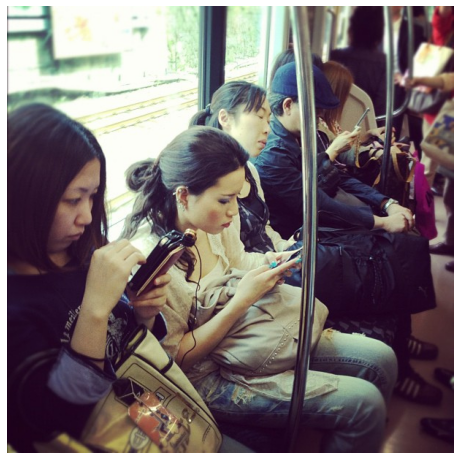

In [13]:
# load and display image
I = io.imread('%s/%s'%(dataDir,img['file_name']))
# use url to load image
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [18]:
# load and display instance annotations
catIds_ = coco.getCatIds(catNms=['cell phone']);
#annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds_, iscrowd=None)
#annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
annIds

[329103, 330031, 330269, 1975764]

In [19]:
anns = coco.loadAnns(annIds)
anns

[{'segmentation': [[219.92,
    366.13,
    202.1,
    373.12,
    202.45,
    378.71,
    204.54,
    380.8,
    209.44,
    382.55,
    212.23,
    383.6,
    183.23,
    394.08,
    180.44,
    396.53,
    178.34,
    396.88,
    173.8,
    394.78,
    165.41,
    386.04,
    163.31,
    382.9,
    173.1,
    369.97,
    184.28,
    355.65,
    191.27,
    350.05,
    190.22,
    346.56,
    208.39,
    322.45,
    211.53,
    317.56,
    215.38,
    313.37,
    225.16,
    308.83,
    230.05,
    308.13,
    234.24,
    308.48,
    238.79,
    310.22,
    241.93,
    310.57,
    244.73,
    308.83,
    248.22,
    306.73,
    251.01,
    305.33,
    256.95,
    307.43,
    260.1,
    311.97,
    257.65,
    319.66,
    255.56,
    322.8,
    253.81,
    329.79,
    247.17,
    329.79,
    244.73,
    329.79]],
  'area': 3503.2020500000003,
  'iscrowd': 0,
  'image_id': 229383,
  'bbox': [163.31, 305.33, 96.79, 91.55],
  'category_id': 77,
  'id': 329103},
 {'segmentation': [[480.42

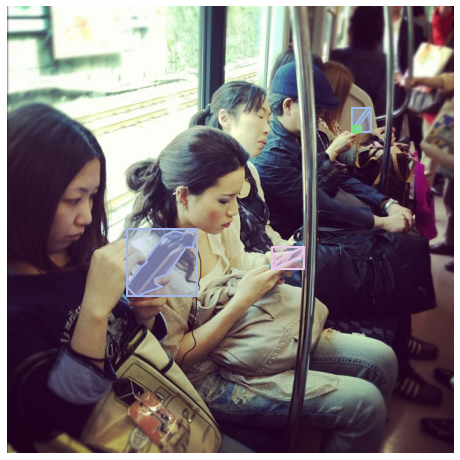

In [20]:
plt.imshow(I); plt.axis('off')
#coco.showAnns(anns)
coco.showAnns(anns, draw_bbox=True)

390


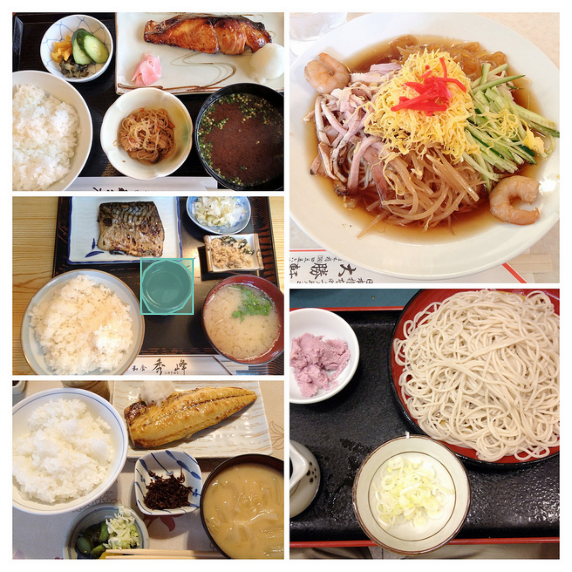

In [28]:
k = 46
coco = coco1
catIds = coco.getCatIds(catNms=['cup']);


imgIds = coco.getImgIds(catIds=catIds );
print(len(imgIds))
img = coco.loadImgs(imgIds[k])[0]
I = io.imread('../../val2017/%s' % img['file_name'])
#I = io.imread('../../train2017/%s'%(dataDir,img['file_name']))
#'../../train2017/'
plt.axis('off')

annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)

anns = coco.loadAnns(annIds)

plt.imshow(I); plt.axis('off')
coco.showAnns(anns, draw_bbox=True)

In [68]:
catIds = coco.getCatIds(catNms=['cup']);

print(catIds)
imgIds = coco.getImgIds(catIds=catIds );

[47]


In [69]:
len(imgIds)

390

In [59]:
coco.cats

{1: {'supercategory': 'person', 'id': 1, 'name': 'person'},
 2: {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 3: {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 4: {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 5: {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 6: {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 7: {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 8: {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 9: {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 10: {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 11: {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 13: {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 14: {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 15: {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 16: {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 17: {'supercategory': 'animal', 'id': 17, 'name': 'cat'},

In [107]:
## The end ##

In [ ]:
# there are no keypoint, caption annotation currently

In [91]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: '../annotations/person_keypoints_val2014.json'

NameError: name 'coco_kps' is not defined

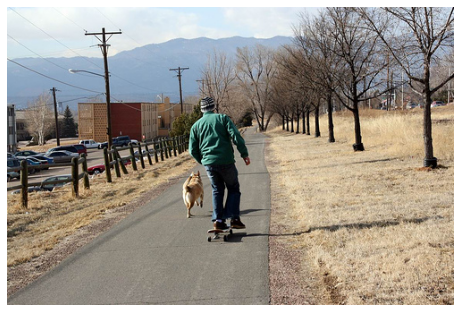

In [10]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [11]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: '../annotations/captions_val2014.json'

In [12]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

NameError: name 'coco_caps' is not defined